In [10]:
import rasterio 
from rasterio.merge import merge
import rasterio.plot
from rasterio.windows import Window
from rasterio.plot import show
import glob
from osgeo import gdal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tables
import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA
from tqdm import tqdm
import matplotlib.pyplot as plt

from osgeo import gdal
# project_id = 'moja-328209'
# !gcloud config set project {project_id}
!gsutil ls
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
pwd

'/home/Asus'

# Changing resolution of files to 250

In [ ]:
from rasterio.enums import Resampling
def resample_raster(input_path, output_path, targetPixelSizeX = 0.002, targetPixelSizeY = 0.002):
    raster = rasterio.open(input_path)
    t = raster.transform

    pixelSizeX = t[0]
    pixelSizeY =-t[4]
    print(pixelSizeX, pixelSizeY)
    scalingFactorX = (targetPixelSizeX / pixelSizeX)
    scalingFactorY = (targetPixelSizeY / pixelSizeY)

    sizeX = raster.shape[0]
    sizeY = raster.shape[1]

    targetSizeX = int(sizeX / scalingFactorX)
    targetSizeY = int(sizeY / scalingFactorY)
    print(targetSizeX, targetSizeY)

    scale = scalingFactorX
    assert (scalingFactorX == scalingFactorY)

    # rescale the metadata
    transform = rasterio.Affine(t.a * scale, t.b, t.c, t.d, t.e * scale, t.f)  # <== multiplication
    height = int(raster.height // scale)                              # <== division
    width = int(raster.width // scale)
    print(height, width)

    profile = raster.profile
    profile.update(transform=transform, driver='GTiff', height=height, width=width, crs=raster.crs)
    print(profile)

    data = raster.read( # Note changed order of indexes, arrays are band, row, col order not row, col, band
            out_shape=(int(raster.count), int(height), int(width)),
            resampling=Resampling.cubic)

    with rasterio.open(output_path,'w', **profile) as dst:
        dst.write(data)

    print("Completed rewriting, now checking values:")
    resampled = rasterio.open(output_path)
    print('Orig dims: {}, New dims: {}'.format(raster.shape, resampled.shape))

from rasterio.enums import Resampling

def resampleRasterforNonSquare(input_path, output_path, targetPixelSizeX = 0.002, targetPixelSizeY = 0.002):
    raster = rasterio.open(input_path)
    t = raster.transform

    pixelSizeX = t[0]
    pixelSizeY =-t[4]
    print(pixelSizeX, pixelSizeY)
    scalingFactorX = (targetPixelSizeX / pixelSizeX)
    scalingFactorY = (targetPixelSizeY / pixelSizeY)

    sizeX = raster.shape[0]
    sizeY = raster.shape[1]

    targetSizeX = int(sizeX / scalingFactorX)
    targetSizeY = int(sizeY / scalingFactorY)
    print(targetSizeX, targetSizeY)

    scale = scalingFactorX

    # assert (scalingFactorX == scalingFactorY)

    # rescale the metadata
    transform = rasterio.Affine(t.a * scalingFactorX, t.b, t.c, t.d, t.e * scalingFactorY, t.f)  # <== multiplication
    height = int(raster.height // scalingFactorX)                              # <== division
    width = int(raster.width // scalingFactorY)
    print(height, width)

    profile = raster.profile
    profile.update(transform=transform, driver='GTiff', height=height, width=width, crs=raster.crs)
    print(profile)

    data = raster.read( # Note changed order of indexes, arrays are band, row, col order not row, col, band
            out_shape=(int(raster.count), int(height), int(width)),
            resampling=Resampling.cubic)

    with rasterio.open(output_path,'w', **profile) as dst:
        dst.write(data)

    print("Completed rewriting, now checking values:")
    resampled = rasterio.open(output_path)
    print('Orig dims: {}, New dims: {}'.format(raster.shape, resampled.shape))

In [ ]:
raster = rasterio.open("/data/uganda/budongo/corrected/2001_resampled.tif")
t = raster.transform

pixelSizeX = t[0]
pixelSizeY =-t[4]
print(pixelSizeX, pixelSizeY)

0.002 0.002


In [ ]:
raster = rasterio.open("/data/philippines/corrected2/2011_resampled.tif")
t = raster.transform

pixelSizeX = t[0]
pixelSizeY =-t[4]
print(pixelSizeX, pixelSizeY)

0.002 0.002


In [ ]:
#changing resolution of files after year 2000 only as matt hansen is available for that only
landsat_tifs = glob.glob("/data/philippines/corrected2/2*.tif")
print(landsat_tifs)
for file in landsat_tifs:
  output_path = file[:-4] + "_resampled.tif"
  print(output_path)
  resampleRasterforNonSquare(file, output_path)

['/data/philippines/corrected2/2011.tif', '/data/philippines/corrected2/2004_resampled.tif', '/data/philippines/corrected2/2018.tif', '/data/philippines/corrected2/2000_resampled.tif', '/data/philippines/corrected2/2010_resampled.tif', '/data/philippines/corrected2/2018_resampled.tif', '/data/philippines/corrected2/2009.tif', '/data/philippines/corrected2/2020.tif', '/data/philippines/corrected2/2005_resampled.tif', '/data/philippines/corrected2/2007.tif', '/data/philippines/corrected2/2016_resampled.tif', '/data/philippines/corrected2/2016.tif', '/data/philippines/corrected2/2003_resampled.tif', '/data/philippines/corrected2/2015_resampled.tif', '/data/philippines/corrected2/2012.tif', '/data/philippines/corrected2/2017_resampled.tif', '/data/philippines/corrected2/2008_resampled.tif', '/data/philippines/corrected2/2001.tif', '/data/philippines/corrected2/2000.tif', '/data/philippines/corrected2/2013_resampled.tif', '/data/philippines/corrected2/2003.tif', '/data/philippines/corrected

CPLE_AppDefinedError: ignored

In [ ]:
#changing resolution of files after year 2000 only as matt hansen is available for that only
landsat_tifs = glob.glob("/data/philippines/matt/*.tif")
print(landsat_tifs)
for file in landsat_tifs:
  output_path = file[:-4] + "_resampled.tif"
  print(output_path)
  resampleRasterforNonSquare(file, output_path)

['/data/philippines/matt/2011.tif', '/data/philippines/matt/2018.tif', '/data/philippines/matt/2009.tif', '/data/philippines/matt/2020.tif', '/data/philippines/matt/2007.tif', '/data/philippines/matt/2016.tif', '/data/philippines/matt/2012.tif', '/data/philippines/matt/2001.tif', '/data/philippines/matt/2000.tif', '/data/philippines/matt/2003.tif', '/data/philippines/matt/2002.tif', '/data/philippines/matt/2015.tif', '/data/philippines/matt/2004.tif', '/data/philippines/matt/2013.tif', '/data/philippines/matt/2017.tif', '/data/philippines/matt/2008.tif', '/data/philippines/matt/2010.tif', '/data/philippines/matt/2019.tif', '/data/philippines/matt/2006.tif', '/data/philippines/matt/2014.tif', '/data/philippines/matt/2005.tif']
/data/philippines/matt/2011_resampled.tif
0.0002694945870535715 0.0002694945731026785
965 965
965 965
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 965, 'height': 965, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.002, 0.0, 120.4

# Checking for null values in original 

In [ ]:
for year in range(2001,2021):
  src = rasterio.open('/data/philippines/original/{}.tif'.format(year))
  X = src.read()
  isnull=0
  print(year)
  for i in range(0, 11):
    isnull+=np.isnan(X[i,:,:]).sum()
    print(i,":",np.isnan(X[i,:,:]).sum())

  print(isnull,"\tShape:",X.shape)
  src.close()
  del X


2001
0 : 24760
1 : 24760
2 : 24760
3 : 24760
4 : 24760
5 : 24760
6 : 24760
7 : 24760
8 : 24760
9 : 24760
10 : 24760
272360 	Shape: (11, 7168, 7168)
2002
0 : 24760
1 : 24760
2 : 24760
3 : 24760
4 : 24760
5 : 24760
6 : 24760
7 : 24760
8 : 24760
9 : 24760
10 : 24760
272360 	Shape: (11, 7168, 7168)
2003
0 : 24760
1 : 24760
2 : 24760
3 : 24760
4 : 24760
5 : 24760
6 : 24760
7 : 24760
8 : 24760
9 : 24760
10 : 24760
272360 	Shape: (11, 7168, 7168)
2004
0 : 24760
1 : 24760
2 : 24760
3 : 24760
4 : 24760
5 : 24760
6 : 24760
7 : 24760
8 : 24760
9 : 24760
10 : 24760
272360 	Shape: (11, 7168, 7168)
2005
0 : 24760
1 : 24760
2 : 24760
3 : 24760
4 : 24760
5 : 24760
6 : 24760
7 : 24760
8 : 24760
9 : 24760
10 : 24760
272360 	Shape: (11, 7168, 7168)
2006
0 : 24760
1 : 24760
2 : 24760
3 : 24760
4 : 24760
5 : 24760
6 : 24760
7 : 24760
8 : 24760
9 : 24760
10 : 24760
272360 	Shape: (11, 7168, 7168)
2007
0 : 24874
1 : 24874
2 : 24874
3 : 24874
4 : 24874
5 : 24874
6 : 24874
7 : 24874
8 : 24760
9 : 24874
10 : 24

In [ ]:
for year in range(2001,2021):
  
  src = rasterio.open('/data/philippines/corrected/{}_resampled.tif'.format(year))
  X = src.read()
  isnull=0
  print(year)
  for i in range(0, 11):
    isnull+=np.isnan(X[i,:,:]).sum()
    print(i,":",np.isnan(X[i,:,:]).sum())

  print(isnull,"\tShape:",X.shape)
  src.close()
  del X


2001
0 : 0
1 : 0
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0
7 : 0
8 : 0
9 : 0
10 : 0
0 	Shape: (11, 643, 643)
2002
0 : 0
1 : 0
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0
7 : 0
8 : 0
9 : 0
10 : 0
0 	Shape: (11, 643, 643)
2003
0 : 0
1 : 0
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0
7 : 0
8 : 0
9 : 0
10 : 0
0 	Shape: (11, 643, 643)
2004
0 : 0
1 : 0
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0
7 : 0
8 : 0
9 : 0
10 : 0
0 	Shape: (11, 643, 643)
2005
0 : 0
1 : 0
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0
7 : 0
8 : 0
9 : 0
10 : 0
0 	Shape: (11, 643, 643)
2006
0 : 0
1 : 0
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0
7 : 0
8 : 0
9 : 0
10 : 0
0 	Shape: (11, 643, 643)
2007
0 : 0
1 : 0
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0
7 : 0
8 : 0
9 : 0
10 : 0
0 	Shape: (11, 643, 643)
2008
0 : 0
1 : 0
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0
7 : 0
8 : 0
9 : 0
10 : 0
0 	Shape: (11, 643, 643)
2009
0 : 0
1 : 0
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0
7 : 0
8 : 0
9 : 0
10 : 0
0 	Shape: (11, 643, 643)
2010
0 : 0
1 : 0
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0
7 : 0
8 : 0
9 : 0
10 : 0
0 	Shape: (11, 643, 643)
2011
0 : 0
1 : 0
2 : 0
3 : 0
4

# checking for null values in resampled


In [ ]:
for year in range(2001,2021):
  src = rasterio.open('/data/uganda/budongo/corrected/{}_resampled.tif'.format(year))
  X = src.read()
  isnull=0
  print(year)
  for i in range(0, 1):
    isnull+=np.isnan(X[i,:,:]).sum()
    print(i,":",np.isnan(X[i,:,:]).sum())

  print(isnull,"\tShape:",X.shape)
  src.close()
  del X


2001
0 : 0
0 	Shape: (11, 965, 965)
2002
0 : 0
0 	Shape: (11, 965, 965)
2003
0 : 0
0 	Shape: (11, 965, 965)
2004
0 : 0
0 	Shape: (11, 965, 965)
2005
0 : 0
0 	Shape: (11, 965, 965)
2006
0 : 0
0 	Shape: (11, 965, 965)
2007
0 : 0
0 	Shape: (11, 965, 965)
2008
0 : 0
0 	Shape: (11, 965, 965)
2009
0 : 0
0 	Shape: (11, 965, 965)
2010
0 : 0
0 	Shape: (11, 965, 965)
2011
0 : 0
0 	Shape: (11, 965, 965)
2012
0 : 0
0 	Shape: (11, 965, 965)
2013
0 : 0
0 	Shape: (11, 965, 965)
2014
0 : 0
0 	Shape: (11, 965, 965)
2015
0 : 0
0 	Shape: (11, 965, 965)
2016
0 : 0
0 	Shape: (11, 965, 965)
2017
0 : 0
0 	Shape: (11, 965, 965)
2018
0 : 0
0 	Shape: (11, 965, 965)
2019
0 : 0
0 	Shape: (11, 965, 965)
2020
0 : 0
0 	Shape: (11, 965, 965)


# Finding min and max of each band

In [ ]:
tmp_max=-np.ones(11)*np.inf
tmp_min=np.ones(11)*np.inf
for year in range(2001,2021):
  print(year)
  src = rasterio.open('/data/philippines/corrected2/{}_resampled.tif'.format(year))
  X = src.read()

  
  for i in range(0, 11):
    if tmp_max[i]<X[i,:,:].max():
      tmp_max[i]=X[i,:,:].max()
    if tmp_min[i]>X[i,:,:].min():
      tmp_min[i]=X[i,:,:].min()

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [ ]:
print("Max: ",tmp_max)
print("Min: ",tmp_min)

Max:  [22140.08007812 22215.9609375  22201.55078125 21188.22265625
 21561.578125    3342.57006836 11755.13671875   603.56799316
    34.80938721   216.70248413     0.        ]
Min:  [-1.23714404e+03 -1.27992065e+03 -1.41292957e+03 -7.78497314e+02
 -3.68723389e+02 -2.41524078e+02 -1.99801834e+02 -2.26623592e+01
 -6.04095936e-01 -8.03244305e+00  0.00000000e+00]


# PCA

In [ ]:
scaler = StandardScaler()

def extract_pixels(path):
  src = rasterio.open(path)
  print(path.split('/')[-1][:4])
  X = src.read()
  print(X.shape)
  # X = X[0:11]
  num_channels = X.shape[0]
  #num_channels = num_channels - 4
  print(X.shape)
  q = X.swapaxes(0, 2)
  del X
  print(q.shape)
  p = q.reshape(-1, num_channels)
  print(p.shape)
  del q
  df = pd.DataFrame(p)
  del p
  print(df.shape)
  # df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= ["band{:02d}".format(i) for i in range(1, 1+num_channels)]
  file_name = "dataset_11bands" + path + ".csv"
  # df.to_csv(file_name)
  
  # print("Completed csv creation")
  return df, file_name

file_list = glob.glob('/data/philippines/corrected2/*_resampled.tif')
file_list.sort()
# filtered_file_list = [file_list[1], file_list[5], file_list[10], file_list[15], file_list[20], file_list[25], file_list[30], file_list[34]]
file_list=file_list[1:]
print(file_list)

# use values from above to get proper scaling. Use these values in normalisation everywhere
max=[22140.08007812,22215.9609375,22201.55078125,21188.22265625,21561.578125,3342.57006836,11755.13671875,603.56799316,34.80938721,216.70248413,0.]
min=[-1237.14404,-1279.92065,-1412.92957,-778.497314,-368.723389,-241.524078,-199.801834,-22.6623592,-0.604095936,-8.03244305,0.00000000]
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min

def normalise(df):
  for k in range(df.shape[1]):
    if (max[k] - min[k])!=0:
      df.iloc[:, k] = -1 + 2*((df.iloc[:, k] - min[k])/(max[k] - min[k]))
  return df

['/data/philippines/corrected2/2001_resampled.tif', '/data/philippines/corrected2/2002_resampled.tif', '/data/philippines/corrected2/2003_resampled.tif', '/data/philippines/corrected2/2004_resampled.tif', '/data/philippines/corrected2/2005_resampled.tif', '/data/philippines/corrected2/2006_resampled.tif', '/data/philippines/corrected2/2007_resampled.tif', '/data/philippines/corrected2/2008_resampled.tif', '/data/philippines/corrected2/2009_resampled.tif', '/data/philippines/corrected2/2010_resampled.tif', '/data/philippines/corrected2/2011_resampled.tif', '/data/philippines/corrected2/2012_resampled.tif', '/data/philippines/corrected2/2013_resampled.tif', '/data/philippines/corrected2/2014_resampled.tif', '/data/philippines/corrected2/2015_resampled.tif', '/data/philippines/corrected2/2016_resampled.tif', '/data/philippines/corrected2/2017_resampled.tif', '/data/philippines/corrected2/2018_resampled.tif', '/data/philippines/corrected2/2019_resampled.tif', '/data/philippines/corrected2/

In [ ]:
#detour to check the values - max and min
max_df = pd.DataFrame()
min_df = pd.DataFrame()

for file in file_list:
  df, _ = extract_pixels(file)
  min_df = min_df.append(df.min(), ignore_index=True)  
  max_df = max_df.append(df.max(), ignore_index=True)

print(max_df.max())
print(min_df.max())

2001
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)
2002
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)
2003
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)
2004
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)
2005
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)
2006
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)
2007
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)
2008
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)
2009
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)
2010
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)
2011
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)
2012
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)
2013
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)
2014
(11, 96

In [ ]:
batch_size = 1000
pca = IncrementalPCA(n_components = 11, batch_size=batch_size, copy=False)
pca_assumed3 = IncrementalPCA(n_components = 3, batch_size=batch_size, copy=False)
pca_assumed4 = IncrementalPCA(n_components = 4, batch_size=batch_size, copy=False)

for file in file_list:
  df_, file_name = extract_pixels(file)
  counter = 0
  total = 0
  df_ = normalise(df_)
  #break
  for batch in tqdm(range(0, df_.shape[0]-batch_size, batch_size)):
    total+=1
    try:  
      pca.partial_fit(df_[batch:batch+batch_size])
      pca_assumed3.partial_fit(df_[batch:batch+batch_size])
      pca_assumed4.partial_fit(df_[batch:batch+batch_size])
    except:  counter+=1
  # pca.partial_fit(df_[df_.shape[0]-batch_size-1:df_.shape[0]])
  # pca_assumed3.partial_fit(df_[df_.shape[0]-batch_size-1:df_.shape[0]])
  print(total, counter)
  print("-------------------------------")
print("Completed the work")

2001
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 117.42it/s]


931 0
-------------------------------
2002
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 116.61it/s]


931 0
-------------------------------
2003
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 118.92it/s]


931 0
-------------------------------
2004
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 117.31it/s]


931 0
-------------------------------
2005
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:08<00:00, 116.19it/s]


931 0
-------------------------------
2006
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 117.18it/s]


931 0
-------------------------------
2007
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 117.20it/s]


931 0
-------------------------------
2008
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 116.96it/s]


931 0
-------------------------------
2009
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:08<00:00, 114.78it/s]


931 0
-------------------------------
2010
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 117.62it/s]


931 0
-------------------------------
2011
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 117.79it/s]


931 0
-------------------------------
2012
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 117.61it/s]


931 0
-------------------------------
2013
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 116.94it/s]


931 0
-------------------------------
2014
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 119.10it/s]


931 0
-------------------------------
2015
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 118.35it/s]


931 0
-------------------------------
2016
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:08<00:00, 116.27it/s]


931 0
-------------------------------
2017
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 116.96it/s]


931 0
-------------------------------
2018
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 117.53it/s]


931 0
-------------------------------
2019
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:04<00:00, 199.10it/s]


931 0
-------------------------------
2020
(11, 965, 965)
(11, 965, 965)
(965, 965, 11)
(931225, 11)
(931225, 11)


100%|████████████████████████████████████████| 931/931 [00:07<00:00, 118.42it/s]

931 0
-------------------------------
Completed the work


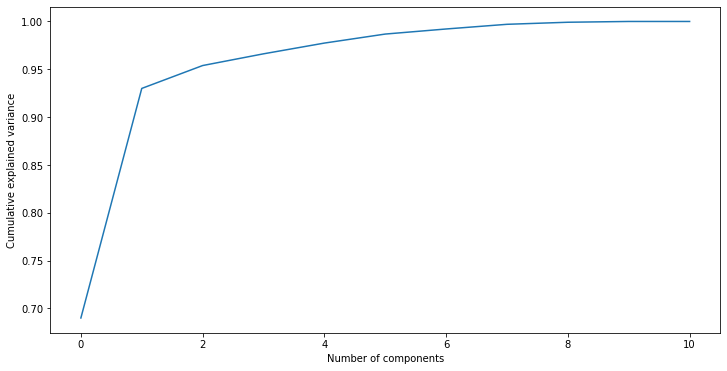

In [ ]:
ev=pca.explained_variance_ratio_
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
print(np.cumsum(ev))
pca_assumed4.components_

[0.69004753 0.93000317 0.95392147 0.96617284 0.97740426 0.98683211
 0.99214295 0.99702727 0.99918392 1.         1.        ]


array([[ 5.55326884e-01,  5.17703521e-01,  5.37791644e-01,
         1.99146277e-01,  1.75188805e-01, -1.83013430e-02,
         1.66168550e-01,  1.89922856e-01,  3.33087218e-04,
         2.67929604e-03, -0.00000000e+00],
       [-1.36690538e-01, -1.21240479e-01, -1.32357349e-01,
        -3.17225061e-02, -6.31410910e-02,  1.28231625e-02,
         3.20608152e-01,  9.17135311e-01,  2.00088186e-03,
         3.10772322e-03,  0.00000000e+00],
       [-2.07689116e-01, -1.12716653e-01, -1.36292985e-01,
         5.28577977e-01,  6.08478771e-01,  2.39241014e-01,
         4.14608349e-01, -1.53027487e-01, -1.06462857e-01,
        -1.09796261e-01,  0.00000000e+00],
       [ 5.62787058e-02,  3.10364736e-02,  6.64235942e-02,
        -2.86052974e-01, -4.35743819e-02,  9.42525329e-01,
        -6.34315995e-03, -2.32926271e-03,  9.52135345e-02,
         1.01326435e-01,  0.00000000e+00]])

In [ ]:
pca_assumed3.components_

array([[ 5.55324265e-01,  5.17701493e-01,  5.37787405e-01,
         1.99167912e-01,  1.75192984e-01, -1.83568042e-02,
         1.66160433e-01,  1.89923369e-01,  3.26157978e-04,
         2.67200295e-03, -0.00000000e+00],
       [-1.36677910e-01, -1.21232976e-01, -1.32346755e-01,
        -3.17631200e-02, -6.31642011e-02,  1.28734414e-02,
         3.20597996e-01,  9.17139533e-01,  2.00605778e-03,
         3.11306150e-03,  0.00000000e+00],
       [-2.04727024e-01, -1.10246848e-01, -1.32774164e-01,
         5.17227325e-01,  6.03266721e-01,  2.91276817e-01,
         4.08020520e-01, -1.50901872e-01, -1.04733936e-01,
        -1.08559455e-01,  0.00000000e+00]])

# Creating h5

In [ ]:
import numpy as np
def make_ts(spectral_data, start, end, look_back):
  X = []
  for i in range(start+look_back, end):
    X_i = []
    for t in range(look_back):
      X_i.append(spectral_data[i-start-look_back+t])
    X.append(np.array(X_i))
  return np.array(X)

root = '/data/philippines/'

def make_dataset_and_save(filename, left_x, right_x, top_y, bottom_y, overlap, picture_size, look_back):
  year_targets = {}
  for year in range(2001, 2021):
    print("Opening", year)
    year_targets[year] = rasterio.open(root + "matt/" + str(year) + "_resampled.tif")

  geo_topleft_x, geo_topleft_y, geo_bottomright_x, geo_bottomright_y = 0, 0, 0, 0
  with rasterio.open(root + "corrected2/2000_resampled.tif") as src:
     geo_topleft_x, geo_topleft_y = rasterio.transform.xy(src.transform, top_y, left_x)
     geo_bottomright_x, geo_bottomright_y = rasterio.transform.xy(src.transform, bottom_y, right_x)

  with rasterio.open(root + 'matt/2000_resampled.tif') as src: #As the middle file
      target_topleft_py, target_topleft_px = src.index(geo_topleft_x, geo_topleft_y)
      target_bottomright_py, target_bottomright_px = src.index(geo_bottomright_x, geo_bottomright_y)
  
  targets_file = rasterio.open(root + 'matt/2000_resampled.tif')
  shortlisted_coords = []

  for i in range(0, right_x-int(picture_size) + 1, int(picture_size*overlap)): #Loops in spectral data coordinates
    for j in range(0, bottom_y-int(picture_size) + 1,  int(picture_size*overlap)):
      y = targets_file.read(window=Window(target_topleft_px+i, target_topleft_py+j, picture_size, picture_size))
      y = y/100
      if np.sum(y) > 0.0:
        shortlisted_coords.append([i, j])
        
  targets_file.close()

  print("Shortlisted", len(shortlisted_coords))
  year_files = {}
  for year in range(2001, 2021):
    print("Opening", year)
    year_files[year] = rasterio.open(root + "corrected2/" + str(year) + "_resampled.tif")

  for coords in shortlisted_coords:
    offset_x = coords[0]
    offset_y = coords[1]

    print("Starting", offset_x, offset_y)

    spectral_data = []
    target_data = []

    for year in range(2001, 2021):
      print("Appending", year)
      spectral_data.append(year_files[year].read(window=Window(offset_x, offset_y, picture_size, picture_size)))

    for year in range(2001+look_back, 2021):
      print("Generating targets", year)
      target_data.append(year_targets[year].read(window=Window(target_topleft_px+offset_x, target_topleft_py+offset_y, picture_size, picture_size)))

    print("Generating time series")

    X_thispatch = make_ts(spectral_data, 2001, 2021, look_back)
    print(X_thispatch.shape)

    y_thispatch = np.array(target_data)
    print(y_thispatch.shape)

    f_X = tables.open_file(filename_X, mode='a')
    f_y = tables.open_file(filename_y, mode='a')

    print("Writing patches...")
    for i in range(X_thispatch.shape[0]):
      f_X.root.data.append(np.reshape(X_thispatch[i], (1, look_back, num_channels, picture_size, picture_size)))
      f_y.root.data.append(np.reshape(y_thispatch[i], (1, 1, picture_size, picture_size)))
    f_X.close()
    f_y.close()
    print("Patches written")

  f_X = tables.open_file(filename_X, mode='a')
  f_y = tables.open_file(filename_y, mode='a')

  print(f_X.root.data.shape)
  print(f_y.root.data.shape)
  f_X.close()
  f_y.close()

In [ ]:
tables.file._open_files.close_all()
filename_X = '/data/philippines/h5_resampled/X.h5'
filename_y = '/data/philippines/h5_resampled/y.h5'
num_channels = 11
look_back = 5
picture_size = 32
f_X = tables.open_file(filename_X, mode='w')
f_y = tables.open_file(filename_y, mode='w')
atom_X = tables.Float64Atom()
array_X = f_X.create_earray(f_X.root, 'data', atom_X, (0, look_back, num_channels, picture_size, picture_size))
atom_y = tables.Int8Atom()
array_y = f_y.create_earray(f_y.root, 'data', atom_y, (0, 1, picture_size, picture_size))
f_X.close()
f_y.close()

filename = ""

make_dataset_and_save(filename, 0, 643, 0, 643, 0.9, picture_size, look_back)

Streaming output truncated to the last 5000 lines.
Appending 2004
Appending 2005
Appending 2006
Appending 2007
Appending 2008
Appending 2009
Appending 2010
Appending 2011
Appending 2012
Appending 2013
Appending 2014
Appending 2015
Appending 2016
Appending 2017
Appending 2018
Appending 2019
Appending 2020
Generating targets 2006
Generating targets 2007
Generating targets 2008
Generating targets 2009
Generating targets 2010
Generating targets 2011
Generating targets 2012
Generating targets 2013
Generating targets 2014
Generating targets 2015
Generating targets 2016
Generating targets 2017
Generating targets 2018
Generating targets 2019
Generating targets 2020
Generating time series
(15, 5, 11, 32, 32)
(15, 1, 32, 32)
Writing patches...
Patches written
Starting 448 308
Appending 2001
Appending 2002
Appending 2003
Appending 2004
Appending 2005
Appending 2006
Appending 2007
Appending 2008
Appending 2009
Appending 2010
Appending 2011
Appending 2012
Appending 2013
Appending 2014
Appending 201

In [ ]:
# Generating shardsenter
PICTURE_SIZE = 32
import random
import tables
suffix = ['_000', '_001', '_002', '_003', '_004', '_005', '_006', '_007', '_008', '_009', '_010', '_011', '_012', '_013', '_014']
X_file = tables.open_file('/data/philippines/h5_resampled/X.h5', mode='r')
y_file = tables.open_file('/data/philippines/h5_resampled/y.h5', mode='r')
size_of_shard = X_file.root.data.shape[0]//15
indices = list(range(X_file.root.data.shape[0]))
num_channels = 11
look_back = 5
picture_size = PICTURE_SIZE
random.shuffle(indices)
for i in range(15):

  filename_X = '/data/philippines/h5_resampled/X'+suffix[i]+'.h5'
  filename_y = '/data/philippines/h5_resampled/y'+suffix[i]+'.h5'
  
  f_X = tables.open_file(filename_X, mode='w')
  f_y = tables.open_file(filename_y, mode='w')
  atom_X = tables.Float64Atom()
  array_X = f_X.create_earray(f_X.root, 'data', atom_X, (0, look_back, num_channels, picture_size, picture_size))
  atom_y = tables.Int8Atom()
  array_y = f_y.create_earray(f_y.root, 'data', atom_y, (0, 1, picture_size, picture_size))
  f_X.close()
  f_y.close()
  f_X = tables.open_file(filename_X, mode='a')
  f_y = tables.open_file(filename_y, mode='a')
  for j in range(size_of_shard):
    print("Shifting ", indices[i*size_of_shard + j], " to shard ", suffix[i])
    f_X.root.data.append(X_file.root.data[indices[i*size_of_shard + j]:indices[i*size_of_shard + j]+1, :, :, :, :])
    f_y.root.data.append(y_file.root.data[indices[i*size_of_shard + j]:indices[i*size_of_shard + j]+1, :, :, :])
  f_X.close()
  f_y.close()

Streaming output truncated to the last 5000 lines.
Shifting  285  to shard  _004
Shifting  4712  to shard  _004
Shifting  2473  to shard  _004
Shifting  4318  to shard  _004
Shifting  2662  to shard  _004
Shifting  3422  to shard  _004
Shifting  5472  to shard  _004
Shifting  308  to shard  _004
Shifting  1461  to shard  _004
Shifting  5909  to shard  _004
Shifting  1097  to shard  _004
Shifting  3835  to shard  _004
Shifting  173  to shard  _004
Shifting  6521  to shard  _004
Shifting  1230  to shard  _004
Shifting  6487  to shard  _004
Shifting  7049  to shard  _004
Shifting  3031  to shard  _004
Shifting  5993  to shard  _004
Shifting  2068  to shard  _004
Shifting  6715  to shard  _004
Shifting  6965  to shard  _004
Shifting  6798  to shard  _004
Shifting  4663  to shard  _004
Shifting  2010  to shard  _004
Shifting  2552  to shard  _004
Shifting  5445  to shard  _004
Shifting  3081  to shard  _004
Shifting  892  to shard  _004
Shifting  2796  to shard  _004
Shifting  6718  to shar

In [ ]:
X_file = tables.open_file('/data/philippines/h5_resampled/X.h5', mode='r')
X_file.root.data.shape[0]

7125

In [ ]:
X_file = tables.open_file('/data/philippines/h5_resampled/y.h5', mode='r')
X_file.root.data.shape[0]

7125

In [ ]:
X_file = tables.open_file('/data/uganda/budongo/h5_resampled/X.h5', mode='r')
X_file.root.data.shape[0]

7260

In [ ]:
X_file = tables.open_file('/data/uganda/budongo/h5_resampled/y.h5', mode='r')
X_file.root.data.shape[0]

7260

# Applying PCA to shards

In [ ]:
import h5py
for year in range(0,10):
  f = h5py.File("/data/philippines/h5_resampled/X_00"+str(year)+".h5","r")
  tm=np.array([f.get("data")])
  print(year,": ",np.sum(np.isnan(tm)))
for year in range(10,15):
  f = h5py.File("/data/philippines/h5_resampled/X_0"+str(year)+".h5","r")
  tm=np.array([f.get("data")])
  print(year,": ",np.sum(np.isnan(tm)))

0 :  0
1 :  0
2 :  0
3 :  0
4 :  0
5 :  0
6 :  0
7 :  0
8 :  0
9 :  0
10 :  0
11 :  0
12 :  0
13 :  0
14 :  0


In [ ]:
# applying pca to shards

# to process large h5 file
max=[22140.08007812,22215.9609375,22201.55078125,21188.22265625,21561.578125,3342.57006836,11755.13671875,603.56799316,34.80938721,216.70248413,0.]
min=[-1237.14404,-1279.92065,-1412.92957,-778.497314,-368.723389,-241.524078,-199.801834,-22.6623592,-0.604095936,-8.03244305,0.00000000]

class Transformer():
  def __init__(self, batch_size):
    tables.file._open_files.close_all()
    self.batch_size = batch_size
    self.num_channels_target = 3
    self.num_channels_initial = 11
    self.look_back = 5
    self.picture_size = PICTURE_SIZE
    self.shard_id = 0
    self.suffix = ['_000', '_001', '_002', '_003', '_004', '_005', '_006', '_007', '_008', '_009', '_010', '_011', '_012', '_013', '_014'] 
    # splitting the entire h5 data into 15 cohorts for faster i/o and preventing memory error
    X = tables.open_file('/data/philippines/h5_resampled/X'+self.suffix[self.shard_id]+'.h5', mode='r')
    self.size_of_shard = X.root.data.shape[0]
    self.num_of_batches_per_shard = int(np.ceil(self.size_of_shard / self.batch_size))
    self.x = self.x_corrected = 0

  def __len__(self):
    return self.num_of_batches_per_shard*len(self.suffix)
  
  def __initialiseFile__(self, shard_id):
    self.x = tables.open_file('/data/philippines/h5_resampled/X'+self.suffix[shard_id]+'.h5', mode='r')
    self.x_corrected = tables.open_file('/data/philippines/h5_resampled/X'+self.suffix[shard_id]+'_afterPCA.h5', mode='w')
    atom_X = tables.Float64Atom()
    array_X = self.x_corrected.create_earray(self.x_corrected.root, 'data', atom_X, (0, self.look_back, self.num_channels_target, self.picture_size, self.picture_size))
    self.x_corrected.close()
    self.x_corrected = tables.open_file('/data/philippines/h5_resampled/X'+self.suffix[shard_id]+'_afterPCA.h5', mode='a')

  def __closeFiles__(self):
    tables.file._open_files.close_all()

  def __getInfo__(self):
    idx_points = np.arange(0, self.size_of_shard+self.batch_size, self.batch_size)
    for idx in tqdm.tqdm(range(len(idx_points)-1)):
      batch_x = self.x.root.data[idx_points[idx]:idx_points[idx]+self.batch_size]   
      for k in range(batch_x.shape[2]):
        print(k, batch_x[:, :, k, :, :].max(), batch_x[:, :, k, :, :].min())
      break
    return

  def __transformBatch__(self, batch_x):
    #print("Batch Shape just after input: ", batch_x.shape)

    for k in range(batch_x.shape[2]):
      if(max[k] - min[k]):
        batch_x[:, :, k, :, :] = -1 + 2*((batch_x[:, :, k, :, :] - min[k])/(max[k] - min[k]))        

    transform = np.array([[ 5.55324265e-01,  5.17701493e-01,  5.37787405e-01,
         1.99167912e-01,  1.75192984e-01, -1.83568042e-02,
         1.66160433e-01,  1.89923369e-01,  3.26157978e-04,
         2.67200295e-03, -0.00000000e+00],
       [-1.36677910e-01, -1.21232976e-01, -1.32346755e-01,
        -3.17631200e-02, -6.31642011e-02,  1.28734414e-02,
         3.20597996e-01,  9.17139533e-01,  2.00605778e-03,
         3.11306150e-03,  0.00000000e+00],
       [-2.04727024e-01, -1.10246848e-01, -1.32774164e-01,
         5.17227325e-01,  6.03266721e-01,  2.91276817e-01,
         4.08020520e-01, -1.50901872e-01, -1.04733936e-01,
        -1.08559455e-01,  0.00000000e+00]])
   
    transformed_batch = np.zeros((1,5,3,PICTURE_SIZE,PICTURE_SIZE))
    for xx in range(batch_x.shape[0]):
      b = batch_x[xx]
      temp_storage = np.zeros((5,3,PICTURE_SIZE,PICTURE_SIZE))
      for i in range(b.shape[0]):
        c = b[i]
        d = np.dot(c.swapaxes(0, 2).reshape(-1, 11), transform.T).reshape((-1, PICTURE_SIZE, 3)).swapaxes(0, 2)
        temp_storage[i] = d
      transformed_batch[xx] = temp_storage
    
    return transformed_batch

  def __transformationAndAppend__(self):
    idx_points = np.arange(0, self.size_of_shard+self.batch_size, self.batch_size)
    #print(idx_points)
    for idx in tqdm.tqdm(range(len(idx_points)-1)):
      #print("Working from: ", idx_points[idx], idx_points[idx]+self.batch_size)
      batch = self.x.root.data[idx_points[idx]:idx_points[idx]+self.batch_size]
      transformedBatch = self.__transformBatch__(batch)
      #print("Batch Shape: ", batch.shape, " | Transformed Batch Shape: ", transformedBatch.shape)
      self.x_corrected.root.data.append(transformedBatch)

In [ ]:
import tqdm
PICTURE_SIZE = 32
TransformerClass = Transformer(1)
for i in range(len(TransformerClass.suffix)):
  print("Starting file: ", i)
  TransformerClass.__initialiseFile__(i)
  TransformerClass.__transformationAndAppend__()
  TransformerClass.__closeFiles__()

Closing remaining open files:/data/philippines/h5_resampled/y.h5...done/data/philippines/h5_resampled/X_000.h5...done/data/uganda/budongo/h5_resampled/y.h5...done/data/uganda/budongo/h5_resampled/X.h5...done/data/philippines/h5_resampled/X_000_afterPCA.h5...done/data/philippines/h5_resampled/X_000.h5...done


Starting file:  0


100%|███████████████████████████████████████| 475/475 [00:00<00:00, 1078.67it/s]
Closing remaining open files:/data/philippines/h5_resampled/X_000.h5...done/data/philippines/h5_resampled/X_000_afterPCA.h5...done/data/philippines/h5_resampled/X_000.h5...done


Starting file:  1


100%|███████████████████████████████████████| 475/475 [00:00<00:00, 1054.65it/s]
Closing remaining open files:/data/philippines/h5_resampled/X_001.h5...done/data/philippines/h5_resampled/X_001_afterPCA.h5...done


Starting file:  2


100%|███████████████████████████████████████| 475/475 [00:00<00:00, 1104.31it/s]
Closing remaining open files:/data/philippines/h5_resampled/X_002_afterPCA.h5...done/data/philippines/h5_resampled/X_002.h5...done


Starting file:  3


100%|███████████████████████████████████████| 475/475 [00:00<00:00, 1081.78it/s]
Closing remaining open files:/data/philippines/h5_resampled/X_003_afterPCA.h5...done/data/philippines/h5_resampled/X_003.h5...done


Starting file:  4


100%|███████████████████████████████████████| 475/475 [00:00<00:00, 1142.30it/s]
Closing remaining open files:/data/philippines/h5_resampled/X_004_afterPCA.h5...done/data/philippines/h5_resampled/X_004.h5...done


Starting file:  5


100%|███████████████████████████████████████| 475/475 [00:00<00:00, 1102.67it/s]
Closing remaining open files:/data/philippines/h5_resampled/X_005_afterPCA.h5...done/data/philippines/h5_resampled/X_005.h5...done


Starting file:  6


100%|███████████████████████████████████████| 475/475 [00:00<00:00, 1049.53it/s]
Closing remaining open files:/data/philippines/h5_resampled/X_006.h5...done/data/philippines/h5_resampled/X_006_afterPCA.h5...done


Starting file:  7


100%|███████████████████████████████████████| 475/475 [00:00<00:00, 1076.99it/s]
Closing remaining open files:/data/philippines/h5_resampled/X_007_afterPCA.h5...done/data/philippines/h5_resampled/X_007.h5...done


Starting file:  8


100%|███████████████████████████████████████| 475/475 [00:00<00:00, 1106.35it/s]
Closing remaining open files:/data/philippines/h5_resampled/X_008.h5...done/data/philippines/h5_resampled/X_008_afterPCA.h5...done


Starting file:  9


100%|███████████████████████████████████████| 475/475 [00:00<00:00, 1088.72it/s]
Closing remaining open files:/data/philippines/h5_resampled/X_009.h5...done/data/philippines/h5_resampled/X_009_afterPCA.h5...done


Starting file:  10


100%|████████████████████████████████████████| 475/475 [00:00<00:00, 823.06it/s]
Closing remaining open files:/data/philippines/h5_resampled/X_010_afterPCA.h5...done/data/philippines/h5_resampled/X_010.h5...done


Starting file:  11


100%|████████████████████████████████████████| 475/475 [00:00<00:00, 625.78it/s]
Closing remaining open files:/data/philippines/h5_resampled/X_011_afterPCA.h5...done/data/philippines/h5_resampled/X_011.h5...done


Starting file:  12


100%|████████████████████████████████████████| 475/475 [00:00<00:00, 544.11it/s]
Closing remaining open files:/data/philippines/h5_resampled/X_012.h5...done/data/philippines/h5_resampled/X_012_afterPCA.h5...done


Starting file:  13


100%|████████████████████████████████████████| 475/475 [00:00<00:00, 513.40it/s]
Closing remaining open files:/data/philippines/h5_resampled/X_013_afterPCA.h5...done/data/philippines/h5_resampled/X_013.h5...done


Starting file:  14


100%|████████████████████████████████████████| 475/475 [00:00<00:00, 510.93it/s]
Closing remaining open files:/data/philippines/h5_resampled/X_014.h5...done/data/philippines/h5_resampled/X_014_afterPCA.h5...done


In [ ]:
import random

all_shard_list = ['_000', '_001', '_002', '_003', '_004', '_005', '_006', '_007', '_008', '_009', '_010', '_011', '_012', '_013', '_014']
# sampled_shard_list = random.sample(all_shard_list, 5)

min_cover = []
max_cover = []

for shard in all_shard_list:
  print("Opening shard ", shard)
  shard_min_cover = []
  shard_max_cover = []
  file_y = tables.open_file('/data/uganda/budongo/h5_resampled/y'+shard +'.h5', mode='r')
  for i in range(file_y.root.data.shape[0]):
    data = np.asarray(file_y.root.data[i][0])
    data = data/100.0
    data = np.where(data<0, 0.0, data)
    shard_min_cover.append(data.min())
    shard_max_cover.append(data.max())
  
  print("Done")
  min_cover.append(shard_min_cover)
  max_cover.append(shard_max_cover)


Opening shard  _000
Done
Opening shard  _001
Done
Opening shard  _002
Done
Opening shard  _003
Done
Opening shard  _004
Done
Opening shard  _005
Done
Opening shard  _006
Done
Opening shard  _007
Done
Opening shard  _008
Done
Opening shard  _009
Done
Opening shard  _010
Done
Opening shard  _011
Done
Opening shard  _012
Done
Opening shard  _013
Done
Opening shard  _014
Done


In [ ]:
min_cover = np.asarray(min_cover)
max_cover = np.asarray(max_cover)
global_min = min_cover.min()
global_max = max_cover.max()
print("Global Mean = ", (global_max+global_min)/2)
mean_min = 0
mean_max = 0
for i in range(max_cover.shape[0]):

  mean_min += min_cover[i][:].mean()
  mean_max += max_cover[i][:].mean()

mean_min /= 5
mean_max /= 5

print((mean_max+mean_min)/2)

Global Mean =  0.43
0.9538987603305785


In [ ]:
import h5py
for year in range(0,10):
  f = h5py.File("/data/uganda/budongo/h5_resampled/X_00"+str(year)+"_afterPCA.h5","r")
  tm=np.array([f.get("data")])
  print(year,": ",np.sum(np.isnan(tm)))
for year in range(10,15):
  f = h5py.File("/data/uganda/budongo/h5_resampled/X_0"+str(year)+"_afterPCA.h5","r")
  tm=np.array([f.get("data")])
  print(year,": ",np.sum(np.isnan(tm)))

0 :  0
1 :  0
2 :  0
3 :  0
4 :  0
5 :  0
6 :  0
7 :  0
8 :  0
9 :  0
10 :  0
11 :  0
12 :  0
13 :  0
14 :  0


# Training

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.models import load_model
from tensorflow.keras.utils import Sequence
tf.test.gpu_device_name()
import tensorflow as tf
from keras import Model

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2022-04-06 13:23:07.974002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-06 13:23:07.974412: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-06 13:23:07.974662: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-06 13:23:07.975047: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-06 13:23:07.975323: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [12]:
# to process large h5 files
# use values from above to get proper scaling. Use these values in normalisation everywhere

class DeforDataSequence(Sequence):
  
  def __init__(self, batch_size, mode, targets = 'regression'):
    self.batch_size = batch_size
    self.mode = mode
    self.shards = 0
    self.folder = 'h5_resampled'
    self.targets = targets
    if self.mode == 'train':
      self.suffix = ['_000', '_001', '_002', '_003', '_004', '_005', '_006', '_007', '_008', '_009', '_010'] # splitting the entire h5 data into 15 cohorts for faster i/o and preventing memory error
      #self.suffix = ['_000']
    elif self.mode == 'test':
      self.suffix = ['_011', '_012', '_013', '_014']
    elif self.mode == 'new_patch':
      self.suffix = ['_000', '_001', '_002', '_003', '_004', '_005', '_006', '_007', '_008', '_009', '_010', '_011', '_012', '_013', '_014']
      self.folder = 'h5_patch2'
    self.x = tables.open_file('/data/philippines/'+self.folder+'/X'+self.suffix[self.shards]+'_afterPCA.h5', mode='r')
    self.y = tables.open_file('/data/philippines/'+self.folder+'/y'+self.suffix[self.shards]+'.h5', mode='r')
    self.size_of_shard = self.x.root.data.shape[0]
    self.num_of_batches_per_shard = int(np.ceil(self.size_of_shard / self.batch_size))

  def __len__(self):
    return self.num_of_batches_per_shard*len(self.suffix)
  
  def __getBatchForVisualisationX__(self, idx, item_ = "None"):
     if item_ is "None":
       item_ = self.suffix[self.shards]
     self.x = tables.open_file('/data/philippines/'+self.folder+'/X'+item_+'_afterPCA.h5', mode='r')
     batch_x = self.x.root.data[(idx-self.shards*self.num_of_batches_per_shard)*self.batch_size : (idx-self.shards*self.num_of_batches_per_shard + 1)*self.batch_size]
     self.x.close()
     return batch_x

  def __getBatchForVisualisationY__(self, idx, item_ = "None"):
     if item_ is "None":
       item_ = self.suffix[self.shards]
     self.y = tables.open_file('/data/philippines/'+self.folder+'/y'+item_+'.h5', mode='r')
     batch_y = self.y.root.data[(idx-self.shards*self.num_of_batches_per_shard)*self.batch_size : (idx-self.shards*self.num_of_batches_per_shard + 1)*self.batch_size]
     self.y.close()
     return batch_y

  def __getitem__(self, idx):
    batch_x = self.x.root.data[(idx-self.shards*self.num_of_batches_per_shard)*self.batch_size : (idx-self.shards*self.num_of_batches_per_shard + 1)*self.batch_size]
    batch_y = self.y.root.data[(idx-self.shards*self.num_of_batches_per_shard)*self.batch_size : (idx-self.shards*self.num_of_batches_per_shard + 1)*self.batch_size]

    batch_y = batch_y/100.0
    batch_y = np.where(batch_y<0.0, 0.0, batch_y)
    if self.targets == 'binary':
      batch_y = np.where(batch_y > 0.28, 1, 0).astype(int) #experiment - converting binary
    


    if (idx-self.shards*self.num_of_batches_per_shard + 1)*self.batch_size >= self.size_of_shard:
      self.x.close()
      self.y.close()
      self.shards = (self.shards+1)%len(self.suffix)
      self.x = tables.open_file('/data/philippines/'+self.folder+'/X'+self.suffix[self.shards]+'_afterPCA.h5', mode='r')
      self.y = tables.open_file('/data/philippines/'+self.folder+'/y'+self.suffix[self.shards]+'.h5', mode='r')
    return batch_x, batch_y

<>:29: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:37: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:29: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:37: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_10070/3706980796.py:29: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if item_ is "None":
/tmp/ipykernel_10070/3706980796.py:37: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if item_ is "None":


In [13]:
#@title Hyperparams
# Do NOT modify code
id = "1_250" #@param {type:"string"}
loss_type = 'mean_squared_error' #@param ["weighted_binary_crossentropy", "binary_crossentropy", "hinge", "mean_squared_error"]
deforested_loss_weight = 100.0 #@param {type:"number"}
optimizer = 'adam' #@param ["adam", "adagrad", "adadelta"]
learning_rate =  0.0005 #@param {type:"number"}
batch_size =  64#@param {type:"integer"}
epochs =  100 #@param {type:"integer"}

In [14]:
from tensorflow.keras.utils import plot_model
PICTURE_SIZE = 32
init = tf.keras.initializers.GlorotNormal()
def create_model():
  return keras.Sequential(
      [ 
      tf.keras.Input(shape=(5, 3, PICTURE_SIZE, PICTURE_SIZE)),
      tf.keras.layers.ConvLSTM2D(filters = 20, kernel_size = (3,3), padding = 'same', kernel_initializer=init, activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 15, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 12, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 10, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 8, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 6, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 4, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 3, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 2, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 1, kernel_size = (3,3), padding = 'same', activation='sigmoid', data_format = 'channels_first'),
      # tf.keras.layers.BatchNormalization(),
      # tf.keras.layers.Permute((2,3,1)),
      # tf.keras.layers.Conv2D(filters = 1, kernel_size = (3,3), padding='same', activation='sigmoid', data_format= 'channels_last'),
      # tf.keras.layers.Permute((3,1,2)), 
      ]
  )
model = create_model()
# plot_model(model, show_shapes=True)
model.summary()

In [15]:
def weighted_binary_cross_entropy(weights: dict, from_logits: bool = False):
    def weighted_cross_entropy_fn(y_true, y_pred):
        tf_y_true = tf.cast(y_true, dtype=y_pred.dtype)
        tf_y_pred = tf.cast(y_pred, dtype=y_pred.dtype)
        weights_v = tf.where(tf.equal(tf_y_true, 1), deforested_loss_weight, 1.0)    #weights_v = tf.where(tf.equal(tf_y_true, 1), weights[1], weights[0])
        ce = K.binary_crossentropy(tf_y_true, tf_y_pred, from_logits=from_logits)
        loss = K.mean(tf.multiply(ce, weights_v))
        return loss
    return weighted_cross_entropy_fn

METRICS = [
  keras.metrics.TruePositives(name='tp',thresholds=0.15),
  keras.metrics.FalsePositives(name='fp',thresholds=0.15),
  keras.metrics.TrueNegatives(name='tn',thresholds=0.15),
  keras.metrics.FalseNegatives(name='fn',thresholds=0.15), 
  keras.metrics.BinaryAccuracy(name='accuracy'),
  keras.metrics.Precision(name='precision',thresholds=0.15),
  keras.metrics.Recall(name='recall',thresholds=0.15),
  keras.metrics.AUC(name='auc'),
]

loss_arg = None
if loss_type == 'weighted_binary_crossentropy':
  loss_arg = weighted_binary_cross_entropy({})
elif loss_type == 'binary_crossentropy':
  loss_arg = tf.keras.losses.BinaryCrossentropy()
elif loss_type == 'hinge':
  loss_arg = tf.keras.losses.Hinge()
elif loss_type == 'mean_squared_error':
  loss_arg = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
elif loss_type == 'mean_absolute_error':
  loss_arg = tf.keras.losses.MeanAbsoluteError()

optimizer_arg = None
if optimizer == 'adam':
  optimizer_arg = keras.optimizers.Adam(learning_rate=learning_rate)
elif optimizer == 'adagrad':
  optimizer_arg = keras.optimizers.Adagrad(learning_rate=learning_rate)
elif optimizer == 'adadelta':
  optimizer_arg = keras.optimizers.Adadelta(learning_rate=learning_rate)

model_path = '/data/philippines/model/' + id 

In [16]:
import datetime as time
model = create_model()
model.compile(loss=loss_arg, optimizer=optimizer_arg, metrics=METRICS)
model_checkpoint_callback = ModelCheckpoint(filepath=model_path)
path='/data/uganda/budongo/log/model_try_'+time.datetime.now().strftime("%Y%m%d-%H%M%S")
csv_logger = CSVLogger(path+'.log', append=True, separator=';')
tensorboard = TensorBoard(log_dir=path,histogram_freq=100)

import sys
sys.stdout = open('/dev/stdout', 'w')

# csv_logger = CSVLogger(sys.stdout)
# tensorboard = TensorBoard(log_dir=sys.stdout)

In [17]:
%load_ext tensorboard

In [18]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 11094), started 0:00:19 ago. (Use '!kill 11094' to kill it.)

In [20]:
data_sequence = DeforDataSequence(64, 'train')
model.fit(x = data_sequence, epochs = epochs, verbose = 2, shuffle=False, callbacks=[model_checkpoint_callback, csv_logger, tensorboard])

print(type(data_sequence))

In [21]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 11094), started 1:36:11 ago. (Use '!kill 11094' to kill it.)

# Testing

In [22]:
model.save(path)

In [23]:
config = model.get_config()
config

{'name': 'sequential_3',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 5, 3, 32, 32),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_4'}},
  {'class_name': 'ConvLSTM2D',
   'config': {'name': 'conv_lstm2d_30',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': True,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'filters': 20,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_first',
    'dilation_rate': (1, 1),
    'activation': 'relu',
    'recurrent_activation': 'hard_sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotNormal',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'unit_

In [24]:
# def weighted_cross_entropy_fn(y_true, y_pred):
#         tf_y_true = tf.cast(y_true, dtype=y_pred.dtype)
#         tf_y_pred = tf.cast(y_pred, dtype=y_pred.dtype)
#         weights_v = tf.where(tf.equal(tf_y_true, 1), deforested_loss_weight, 1.0)    #weights_v = tf.where(tf.equal(tf_y_true, 1), weights[1], weights[0])
#         ce = K.binary_crossentropy(tf_y_true, tf_y_pred, from_logits=from_logits)
#         loss = K.mean(tf.multiply(ce, weights_v))
#         return loss

custom_objects = {"weighted_cross_entropy_fn": weighted_binary_cross_entropy}
# path='/data/uganda/budongo/log/model_20220116-102819'

In [25]:
# with keras.utils.custom_object_scope(custom_objects):
print("Fd")
model = keras.models.load_model(path)
print("Fd")
data_sequence = DeforDataSequence(64, 'test')
print("Fd")
result = model.evaluate(x = data_sequence, verbose = 0)
print("Fd")
result = {out: result[i] for i, out in enumerate(model.metrics_names)}
print("Fd")
test_results = pd.DataFrame(result, index = [0])
print("Fd")

test_results.to_csv(path+'.csv')
print("Fd")

# temporary

In [ ]:
import h5py
for year in range(0,10):
  f = h5py.File("/data/uganda/budongo/h5_resampled/y_00_try"+str(year)+".h5","r")
  tm=np.array([f.get("data")])
  print("Shard ",year," : ",np.average(tm),"       ",np.std(tm))
for year in range(10,15):
  f = h5py.File("/data/uganda/budongo/h5_resampled/y_0_try"+str(year)+".h5","r")
  tm=np.array([f.get("data")])
  print("Shard",year," : ",np.average(tm),"       ",np.std(tm))

FileNotFoundError: ignored